# Classifying Personal Income

In [68]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [69]:
# importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle


In [70]:
# Reading the dataset
Df=pd.read_csv("D:\python iitb cous\data files\week4 datasets\income.csv")

# Dimension of the dataset
print("Dimension of the data set", Df.shape)

# Removing duplicate rows if any
Df=Df.drop_duplicates()
print('Shape After deleting duplicate values:', Df.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
Df.head()

Dimension of the data set (31978, 13)
Shape After deleting duplicate values: (28516, 13)


,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


## Basic Data Exploration

In [71]:
# Looking at sample rows in the data
Df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [72]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28516 entries, 0 to 31976
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            28516 non-null  int64 
 1   JobType        28516 non-null  object
 2   EdType         28516 non-null  object
 3   maritalstatus  28516 non-null  object
 4   occupation     28516 non-null  object
 5   relationship   28516 non-null  object
 6   race           28516 non-null  object
 7   gender         28516 non-null  object
 8   capitalgain    28516 non-null  int64 
 9   capitalloss    28516 non-null  int64 
 10  hoursperweek   28516 non-null  int64 
 11  nativecountry  28516 non-null  object
 12  SalStat        28516 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.0+ MB


In [73]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
Df.dtypes

age               int64
JobType          object
EdType           object
maritalstatus    object
occupation       object
relationship     object
race             object
gender           object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
SalStat          object
dtype: object

In [74]:
# Looking at the descriptive statistics of the Numerical data
Df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,28516.000000,28516.000000,28516.000000,28516.000000
mean,39.261046,1185.231204,96.733764,40.619512
std,13.711978,7693.642033,422.964800,12.740703
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,39.000000
50%,38.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [75]:
# Looking at the descriptive statistics of the Catgorical data
Df.describe(include="O")

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,28516,28516,28516,28516,28516,28516,28516,28516,28516
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,19214,8754,12966,3783,11261,24054,18829,25721,21451


In [76]:
Df.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

# Visual Exploratory Data Analysis

In [77]:
#Categorical variables: Bar plot
#Continuous variables: Histogram

# Visualize distribution of all the Categorical Predictor variables in the data using bar plots

Categorical feature: JobType


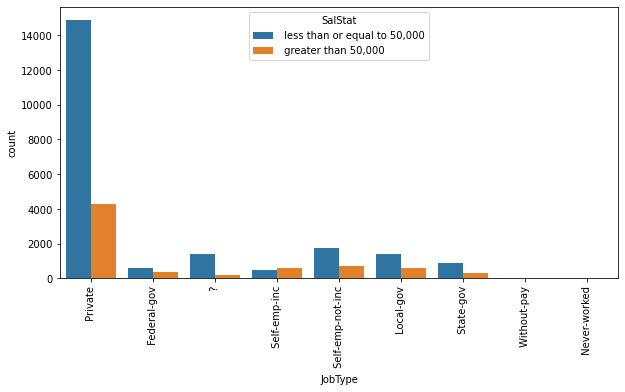

Categorical feature: EdType


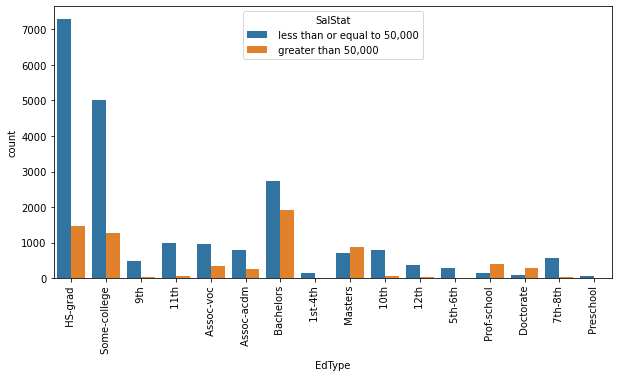

Categorical feature: maritalstatus


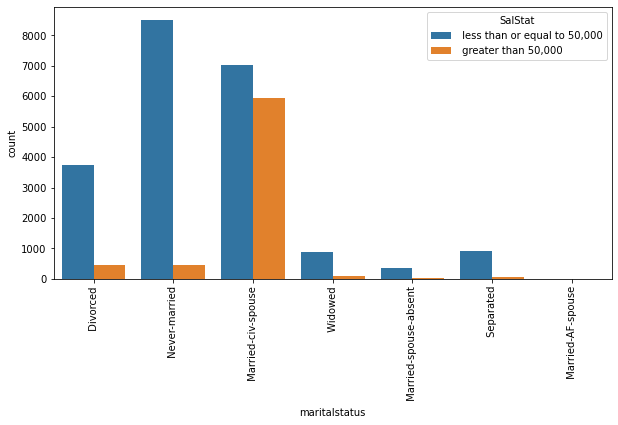

Categorical feature: occupation


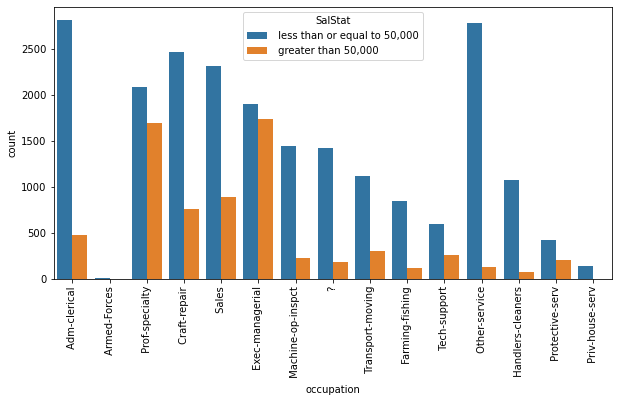

Categorical feature: relationship


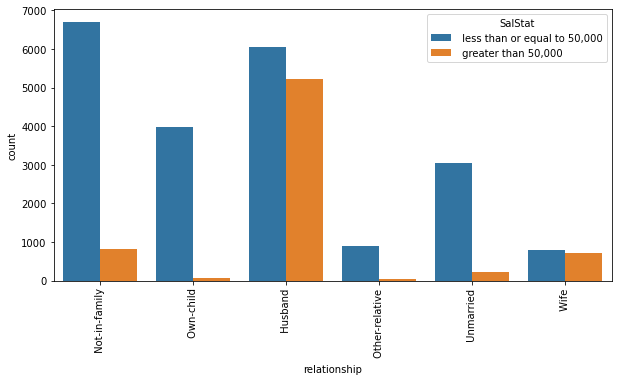

Categorical feature: race


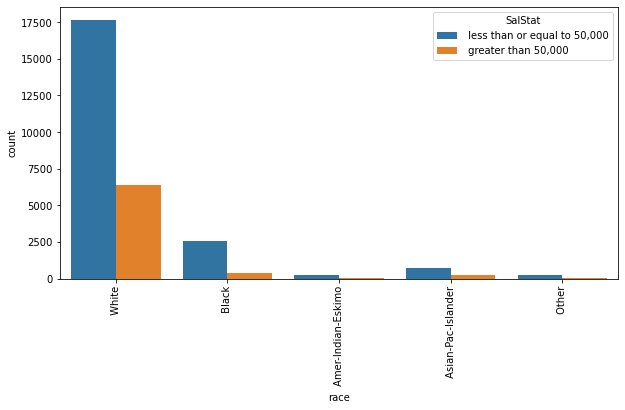

Categorical feature: gender


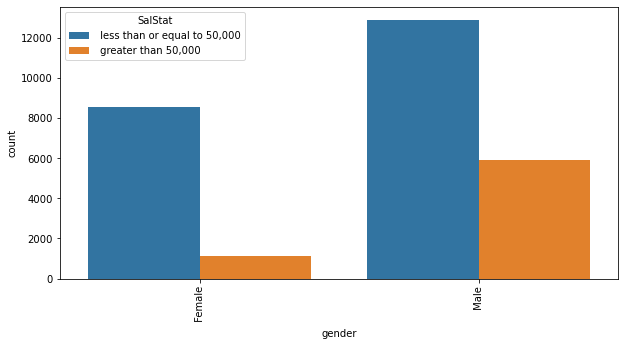

Categorical feature: nativecountry


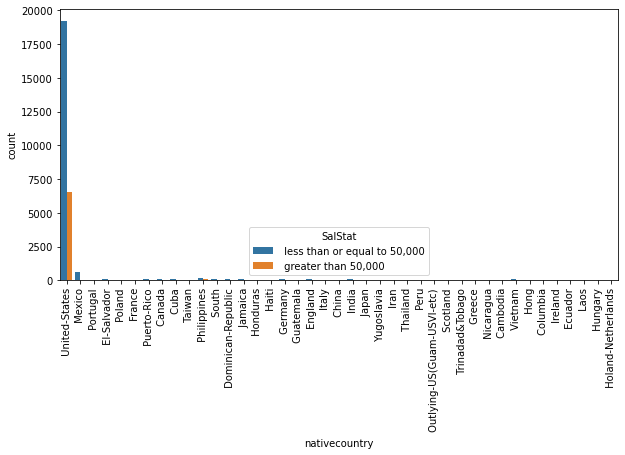

In [78]:
columns=['JobType','EdType','maritalstatus','occupation','relationship','race','gender','nativecountry']

for i in columns:
    plt.figure(figsize=(10,5))
    print("Categorical feature:" ,i)
    sns.countplot(x=Df[i], hue=Df['SalStat'])
    plt.xticks(rotation=90)
    plt.show()

# Visualize distribution of all the Continuous Predictor variables in the data using histograms¶

Numerical feature: age


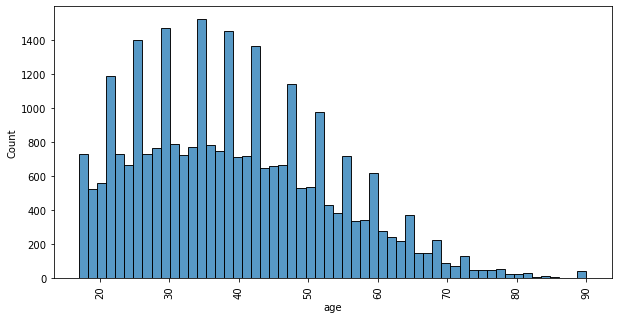

Numerical feature: capitalgain


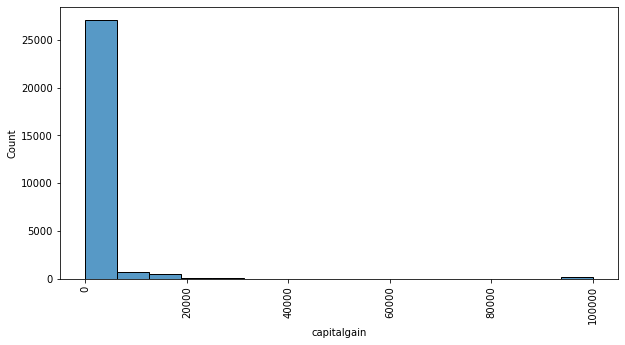

Numerical feature: capitalloss


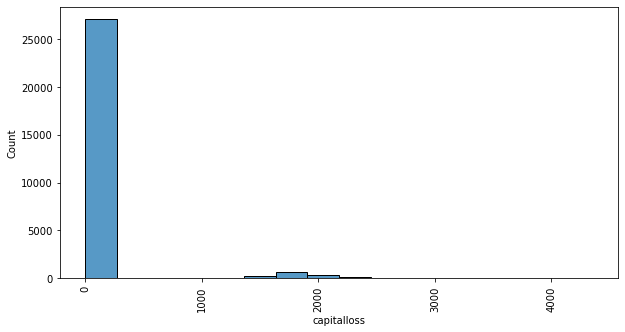

Numerical feature: hoursperweek


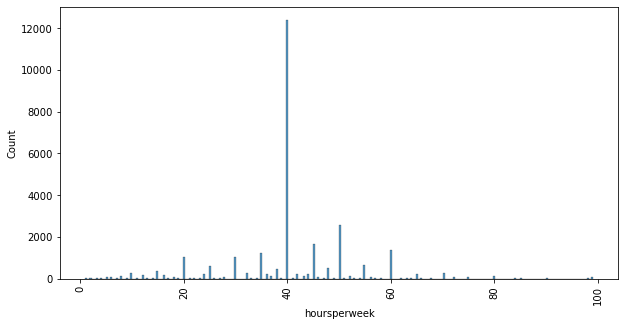

In [79]:
#Plotting histograms of multiple columns together
col=['age','capitalgain', 'capitalloss','hoursperweek']
for i in col:
    plt.figure(figsize=(10,5))
    print("Numerical feature:" ,i)
    sns.histplot(x=Df[i])
    plt.xticks(rotation=90)
    plt.show()

# observations
age : Selected.
capital_gain: Selected. Outliers seen beyond 40000, need to treat them.
capital.loss: Selected. Outliers seen beyond 1000, need to treat them.
hours_per_week: Selected. Distribution looks good.

# Dealing with missing values

In [80]:
# checking number of missing values and samples
Df.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [81]:
for i in Df.columns:
    print("Unique values of feature : ",i)
    print(Df[i].unique())
    print("************************")

Unique values of feature :  age
[45 24 44 27 20 51 17 19 60 40 30 38 23 32 54 50 37 52 49 22 35 67 46 33
 43 28 41 25 63 59 34 26 72 62 58 47 39 53 57 21 42 74 36 29 31 69 18 65
 55 48 71 70 66 56 61 68 64 73 81 78 76 90 88 75 77 80 82 79 83 84 85 86
 87]
************************
Unique values of feature :  JobType
[' Private' ' Federal-gov' ' ?' ' Self-emp-inc' ' Self-emp-not-inc'
 ' Local-gov' ' State-gov' ' Without-pay' ' Never-worked']
************************
Unique values of feature :  EdType
[' HS-grad' ' Some-college' ' 9th' ' 11th' ' Assoc-voc' ' Assoc-acdm'
 ' Bachelors' ' 1st-4th' ' Masters' ' 10th' ' 12th' ' 5th-6th'
 ' Prof-school' ' Doctorate' ' 7th-8th' ' Preschool']
************************
Unique values of feature :  maritalstatus
[' Divorced' ' Never-married' ' Married-civ-spouse' ' Widowed'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse']
************************
Unique values of feature :  occupation
[' Adm-clerical' ' Armed-Forces' ' Prof-specialty' ' C

In [82]:
#observation: Jobtype and occupation are having the "?" so need to convert it to nan values

In [83]:
Df[Df['JobType']==' ?']

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,?,11th,Never-married,?,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,?,Some-college,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,?,Some-college,Never-married,?,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,?,12th,Never-married,?,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,?,1st-4th,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31884,67,?,11th,Married-civ-spouse,?,Husband,White,Male,0,0,8,United-States,"less than or equal to 50,000"
31885,30,?,Assoc-voc,Divorced,?,Unmarried,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31934,20,?,HS-grad,Never-married,?,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,?,Some-college,Married-civ-spouse,?,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"


In [84]:
Df=pd.read_csv("D:\python iitb cous\data files\week4 datasets\income.csv", na_values=[' ?'])
Df=Df.drop_duplicates()

In [85]:
Df.shape

(28516, 13)

In [86]:
Df.isnull().sum()

age                 0
JobType          1605
EdType              0
maritalstatus       0
occupation       1612
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [87]:
 '''Observation : 1. Missing values in jobtype =1809
                 2. Missing values in occupation =1816
                 3. There are 1809 rows where two specific columns i.e occupation and jobtype have missing values 
                 4. so where ever JobType is nan there occupation is also nan
                 5. So it is difficult to impute missing values. so drop missing values'''

'Observation : 1. Missing values in jobtype =1809\n                2. Missing values in occupation =1816\n                3. There are 1809 rows where two specific columns i.e occupation and jobtype have missing values \n                4. so where ever JobType is nan there occupation is also nan\n                5. So it is difficult to impute missing values. so drop missing values'

In [88]:
Df=Df.dropna(axis=0)
Df.shape

(26904, 13)

# Dealing with Outliers

Boxplot for feature : age


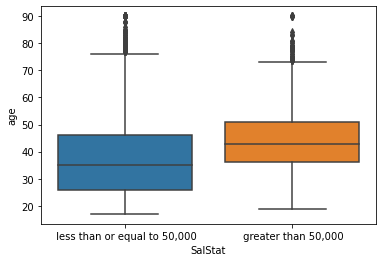

Boxplot for feature : capitalgain


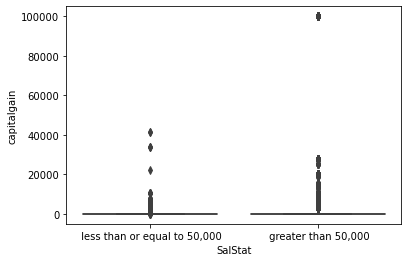

Boxplot for feature : capitalloss


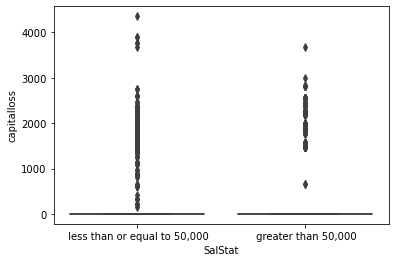

Boxplot for feature : hoursperweek


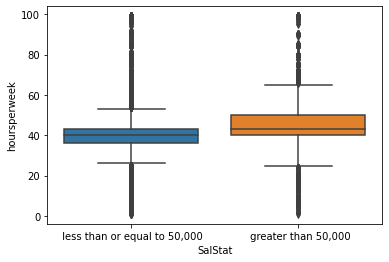

In [89]:
col=['age', 'capitalgain', 'capitalloss','hoursperweek' ]
for i in col:
    print("Boxplot for feature :", i  )
    sns.boxplot(x=Df['SalStat'],y=Df[i])
    plt.show()

In [90]:
# from the box plot we can see that there are number of outliers in features
## Finding the outliuers using IQR Method
def outlier(list):
    import pandas as pd
    df1=pd.Series(list)
    q1=df1.quantile(0.25)
    q3=df1.quantile(0.75)
    iqr=q3-q1
    left=q1-(1.5*iqr)
    right=q3+(1.5*iqr)
    outliers_left=[]
    outliers_right=[]
    for i in list:
        if i<left:
            outliers_left.append(i)
        elif i>right:
            outliers_right.append(i)
    print ('data range', left,'to', right)
    if len(outliers_left)>0:
        print ('Outliers at left side ',outliers_left)
    elif len(outliers_right)>0:
        print ('Outliers at right side ',outliers_right)
    else:
        print ('There are no outliers in your data')
    return 

In [91]:
col=['age', 'capitalgain', 'capitalloss','hoursperweek' ]
for i in col:
    print("feature :", i  )
    outlier(Df[i])
    

feature : age
data range 0.5 to 76.5
Outliers at right side  [81, 78, 90, 88, 90, 77, 90, 77, 78, 80, 90, 81, 81, 80, 90, 79, 81, 90, 80, 90, 90, 79, 78, 79, 84, 90, 77, 80, 77, 90, 81, 83, 84, 79, 85, 82, 79, 77, 90, 90, 84, 78, 78, 80, 90, 90, 77, 84, 90, 90, 77, 90, 77, 78, 77, 81, 78, 82, 81, 77, 80, 90, 80, 84, 82, 78, 79, 90, 84, 90, 83, 78, 80, 77, 78, 79, 80, 79, 80, 90, 90, 90, 81, 83, 90, 90, 81, 80, 80, 90, 79, 77, 77, 80, 82, 85, 80, 79, 90, 77, 79, 81, 77, 88, 90, 82, 88, 77, 83, 77, 79, 77, 86, 90, 77, 82, 83, 81, 79, 84, 78, 78, 84, 79, 78, 90, 80, 81, 78, 81, 80, 82, 90, 90, 85, 79, 90, 77]
feature : capitalgain
data range 0.0 to 0.0
Outliers at right side  [15024, 15024, 7688, 20051, 5013, 7688, 2174, 6849, 1055, 15024, 15024, 15024, 5178, 4101, 8614, 3411, 2597, 25236, 4386, 4650, 7298, 2407, 594, 14084, 7688, 7688, 2463, 5178, 3103, 4386, 4386, 10605, 2174, 7688, 15024, 3103, 4101, 2964, 3325, 2580, 15024, 15024, 3103, 7688, 7298, 3471, 7298, 3103, 4865, 15024, 7298,

data range 0.0 to 0.0
Outliers at right side  [1977, 1380, 1977, 1887, 1902, 1721, 1902, 1380, 2051, 2377, 1669, 2352, 1902, 1721, 1672, 653, 2415, 2415, 1977, 2392, 1504, 1902, 1719, 1902, 1902, 1977, 1902, 1902, 1590, 1977, 1651, 1977, 1902, 1762, 1887, 1977, 1876, 1628, 1848, 1564, 1762, 1887, 1672, 1902, 2051, 2001, 1980, 1340, 2339, 1628, 1887, 1848, 1977, 1740, 2002, 1902, 1887, 1902, 1902, 1719, 2339, 1902, 1579, 1902, 1741, 1628, 2415, 1408, 1740, 2258, 1485, 1848, 1977, 1485, 1887, 1902, 1669, 1887, 1977, 1741, 1602, 1902, 1719, 1902, 1887, 1887, 1887, 1408, 1579, 1741, 1564, 2547, 2206, 2415, 1590, 2415, 1980, 1741, 1977, 1340, 1902, 1977, 2339, 1977, 2205, 1977, 1726, 1485, 2444, 2392, 1672, 1138, 1902, 1740, 1669, 1902, 1762, 2415, 2238, 1876, 2258, 1977, 1672, 2352, 1977, 1977, 1977, 1977, 1977, 2415, 2002, 1902, 1887, 1669, 1848, 1590, 1590, 2179, 1669, 625, 1902, 1977, 2377, 1902, 1887, 2392, 1485, 1848, 1902, 213, 1672, 1628, 1740, 1977, 1876, 1816, 1887, 1485, 1977, 18

# Imputation of Outliers 

In [92]:
# Replacing the outliers with median
Df['age']=Df['age'].mask(Df['age']>76.5,Df['age'].median())

In [93]:
# Replacing the outliers with median
Df['hoursperweek']=Df['hoursperweek'].mask(Df['hoursperweek']>52.5,Df['hoursperweek'].median())
Df['hoursperweek']=Df['hoursperweek'].mask(Df['hoursperweek']<32.5,Df['hoursperweek'].median())


In [94]:
#Replacing outliers for 'capital_gain'
# Finding nearest values to 40000 mark
Df['capitalgain'][Df['capitalgain']>40000].sort_values()

5874     41310
19384    41310
789      99999
20673    99999
21170    99999
         ...  
10332    99999
10334    99999
10847    99999
11417    99999
31504    99999
Name: capitalgain, Length: 149, dtype: int64

In [95]:
# Replacing outliers with nearest possibe value
Df['capitalgain'][Df['capitalgain']>40000] = 41310

In [96]:
# Finding nearest values to 1000 mark
Df['capitalloss'][Df['capitalloss']>1000].sort_values(ascending=False)

14057    4356
22942    3900
19620    3900
15221    3770
11260    3770
         ... 
15062    1092
11168    1092
9159     1092
29998    1092
26825    1092
Name: capitalloss, Length: 1385, dtype: int64

In [97]:
# Replacing outliers with nearest possibe value
Df['capitalloss'][Df['capitalloss']>1000] = 974

# Outliers after treatment

Boxplot for feature : age


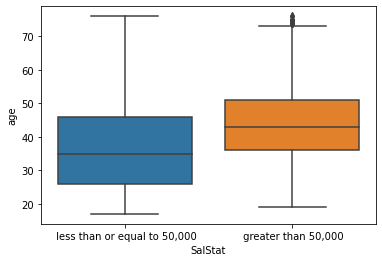

Boxplot for feature : capitalgain


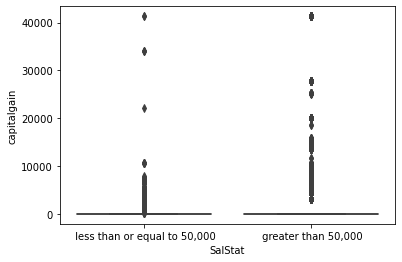

Boxplot for feature : capitalloss


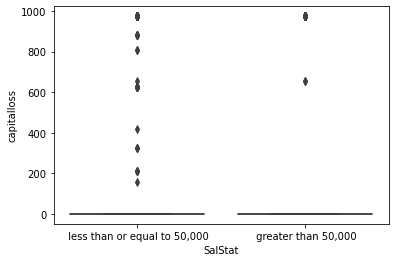

Boxplot for feature : hoursperweek


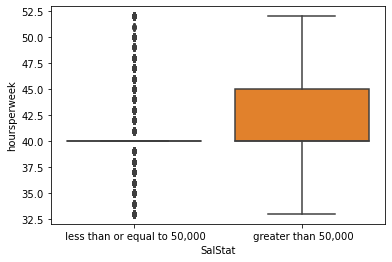

In [98]:
col=['age', 'capitalgain', 'capitalloss','hoursperweek' ]
for i in col:
    print("Boxplot for feature :", i  )
    sns.boxplot(x=Df['SalStat'],y=Df[i])
    plt.show()

Numerical feature: age


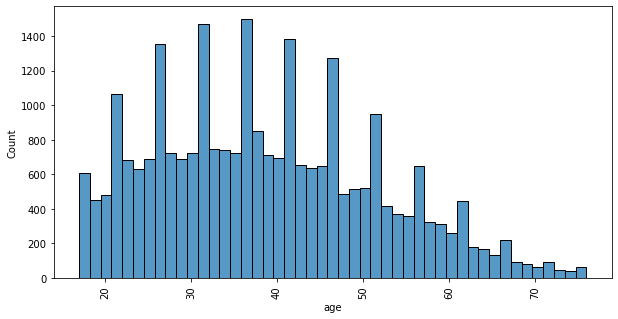

Numerical feature: capitalgain


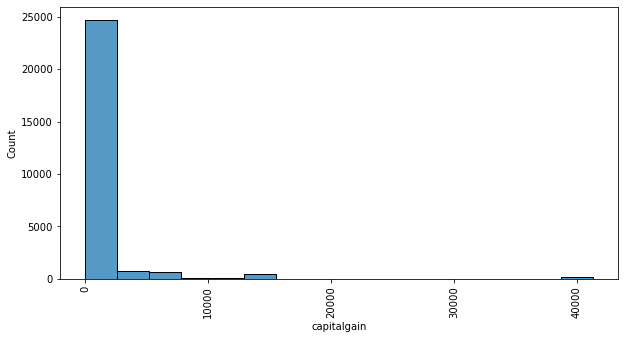

Numerical feature: capitalloss


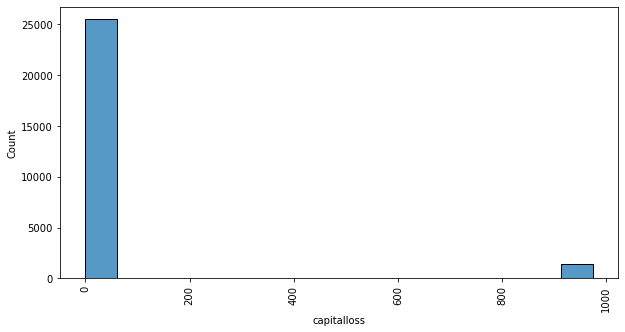

Numerical feature: hoursperweek


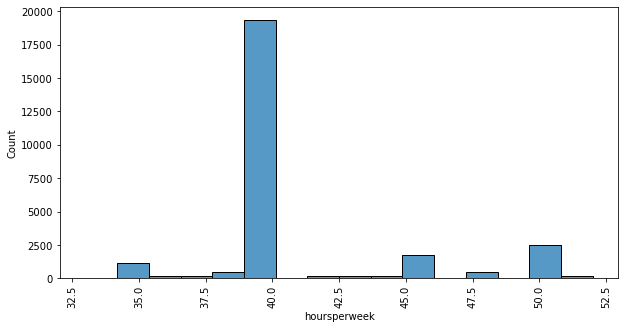

In [99]:
col=['age','capitalgain', 'capitalloss','hoursperweek']
for i in col:
    plt.figure(figsize=(10,5))
    print("Numerical feature:" ,i)
    sns.histplot(x=Df[i])
    plt.xticks(rotation=90)
    plt.show()

##Observation: The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable

# Feature Selection

##Statistical measurement
Continuous Vs Continuous ---- Correlation matrix
Categorical Vs Continuous---- ANOVA test
Categorical Vs Categorical--- Chi-Square test

##In case of this Data we have target variable as categorical and predictors as continuos we have to use ANOVA test
##In case of this Data we have target variable as categorical and predictors as categorical  we have to use Chi-Squatred test

## Feature selection using ANOVA test

In [100]:
#Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [101]:
ContinuousVariables=['age', 'capitalgain', 'capitalloss','hoursperweek' ]
FunctionAnova(inpData=Df, TargetVariable='SalStat', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

age is correlated with SalStat | P-Value: 0.0
capitalgain is correlated with SalStat | P-Value: 0.0
capitalloss is correlated with SalStat | P-Value: 1.4049382834616348e-121
hoursperweek is correlated with SalStat | P-Value: 1.1036183401827715e-171


['age', 'capitalgain', 'capitalloss', 'hoursperweek']

In [102]:
'''##statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test
Chi-Square test is conducted to check the correlation between two categorical variables
Assumption(H0): The two columns are NOT related to each other
Result of Chi-Sq Test: The Probability of H0 being True'''

'##statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test\nChi-Square test is conducted to check the correlation between two categorical variables\nAssumption(H0): The two columns are NOT related to each other\nResult of Chi-Sq Test: The Probability of H0 being True'

In [103]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [104]:
CategoricalVariables=['JobType','EdType','maritalstatus','occupation','relationship','race','gender','nativecountry']
# Calling the function
FunctionChisq(inpData=Df, 
              TargetVariable='SalStat',
              CategoricalVariablesList= CategoricalVariables)

JobType is correlated with SalStat | P-Value: 5.50579174582779e-150
EdType is correlated with SalStat | P-Value: 0.0
maritalstatus is correlated with SalStat | P-Value: 0.0
occupation is correlated with SalStat | P-Value: 0.0
relationship is correlated with SalStat | P-Value: 0.0
race is correlated with SalStat | P-Value: 3.2992595217020476e-67
gender is correlated with SalStat | P-Value: 3.238247006853645e-278
nativecountry is correlated with SalStat | P-Value: 1.5453967469835236e-45


['JobType',
 'EdType',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'gender',
 'nativecountry']

In [105]:
# Final Predictors
Final_p=['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek']
# Selecting final columns
DataForML=Df[Final_p]
DataForML.head()
# Saving this final data for reference during deployment
import  pickle
with open('DataForML.pkl', 'wb') as fileWriteStream:
    pickle.dump(DataForML, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

In [106]:
data=Df[Final_p]
data.head

<bound method NDFrame.head of         age       JobType         EdType        maritalstatus  \
0      45.0       Private        HS-grad             Divorced   
1      24.0   Federal-gov        HS-grad        Never-married   
2      44.0       Private   Some-college   Married-civ-spouse   
3      27.0       Private            9th        Never-married   
4      20.0       Private   Some-college        Never-married   
...     ...           ...            ...                  ...   
31972  33.0       Private        Masters   Married-civ-spouse   
31973  34.0     Local-gov        HS-grad        Never-married   
31974  34.0     Local-gov   Some-college        Never-married   
31975  23.0       Private   Some-college   Married-civ-spouse   
31976  42.0     Local-gov   Some-college   Married-civ-spouse   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child 

In [107]:
'''##Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1.Converting each Ordinal Categorical columns to numeric
2.Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3.Converting all other nominal categorical columns to numeric using pd.get_dummies()
4.Data Transformation (Optional): Standardization/Normalization/log/sqrt.
    Important if you are using distance based algorithms like KNN, or Neural Networks'''

'##Data Pre-processing for Machine Learning\nList of steps performed on predictor variables before data can be used for machine learning\n1.Converting each Ordinal Categorical columns to numeric\n2.Converting Binary nominal Categorical columns to numeric using 1/0 mapping\n3.Converting all other nominal categorical columns to numeric using pd.get_dummies()\n4.Data Transformation (Optional): Standardization/Normalization/log/sqrt.\n    Important if you are using distance based algorithms like KNN, or Neural Networks'

In [108]:
# mapping male=1 and female=0
data['gender'].replace({' Female':0, ' Male':1}, inplace=True)

In [109]:
#Get one hot encoding using pd.get_dummies() for other nominal variables
x=pd.get_dummies(data)
x.head()

,age,gender,capitalgain,capitalloss,hoursperweek,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,45.0,0,0,0,40.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,24.0,1,0,0,40.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,44.0,1,0,0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,27.0,1,0,0,40.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,20.0,1,0,0,35.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [110]:
# Transforming non numerical labels into numerical labels of target variables
from sklearn import preprocessing 
encoder = preprocessing.LabelEncoder()
y=Df['SalStat']
# encoding  labels 
encoder.fit(y)
y = encoder.transform(y)
np.unique(y, return_counts=True)

(array([0, 1]), array([ 6880, 20024], dtype=int64))

In [111]:
# dividing X, y into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state = 0)
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

Dimension of Train set (20178, 60)
Dimension of Test set (6726, 60) 



# Logistic Regression

In [112]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# Creating the model on Training Data
LR=clf.fit(X_train,Y_train)
prediction=LR.predict(X_test)

#measuring accuracy of train test
print('Accuracy of the model on Traning Sample Data:',LR.score(X_train,Y_train))

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LR, x , y, cv=10)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Accuracy of the model on Traning Sample Data: 0.8330855387055208
              precision    recall  f1-score   support

           0       0.71      0.58      0.64      1712
           1       0.86      0.92      0.89      5014

    accuracy                           0.83      6726
   macro avg       0.79      0.75      0.76      6726
weighted avg       0.83      0.83      0.83      6726

[[ 991  721]
 [ 407 4607]]
Accuracy of the model on Testing Sample Data: 0.83

Accuracy values for 10-fold Cross Validation:
 [0.82014121 0.8361204  0.83091787 0.81939799 0.84572491 0.83828996
 0.82788104 0.83197026 0.83494424 0.82899628]

Final Average Accuracy of the model: 0.83


# K-Nearest Neighbor(KNN)

In [113]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,15):
    clf = KNeighborsClassifier(n_neighbors=i)  #K=1 , clf is my model
    clf.fit(X_train, Y_train) #traininig algorithm  
    print('neighbors k=',i,clf.score(X_test, Y_test)) #test
    #print ('\n')

clf = KNeighborsClassifier(n_neighbors=13)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,Y_train)
prediction=KNN.predict(X_test)

#measuring accuracy of train test
print('Accuracy of the model on Traning Sample Data:',KNN.score(X_train,Y_train))

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data x and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, x , y, cv=10)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

neighbors k= 1 0.7805530776092774
neighbors k= 2 0.7567647933392804
neighbors k= 3 0.8169788878977103
neighbors k= 4 0.8055307760927743
neighbors k= 5 0.8256021409455843
neighbors k= 6 0.8175735950044603
neighbors k= 7 0.8288730300327088
neighbors k= 8 0.820844484091585
neighbors k= 9 0.8294677371394589
neighbors k= 10 0.8248587570621468
neighbors k= 11 0.8302111210228962
neighbors k= 12 0.8244127267320844
neighbors k= 13 0.8331846565566459
neighbors k= 14 0.8278322925958965
KNeighborsClassifier(n_neighbors=13)
Accuracy of the model on Traning Sample Data: 0.8575676479333928
              precision    recall  f1-score   support

           0       0.70      0.60      0.64      1712
           1       0.87      0.91      0.89      5014

    accuracy                           0.83      6726
   macro avg       0.79      0.75      0.77      6726
weighted avg       0.83      0.83      0.83      6726

[[1019  693]
 [ 429 4585]]
Accuracy of the model on Testing Sample Data: 0.83

Accuracy val

# Support Vector Machines(SVM)

In [114]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(kernel='rbf')

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,Y_train)
prediction=SVM.predict(X_test)

#measuring accuracy of train test
print('Accuracy of the model on Traning Sample Data:',SVM.score(X_train,Y_train))

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))



SVC()
Accuracy of the model on Traning Sample Data: 0.7922985429675885
              precision    recall  f1-score   support

           0       0.74      0.29      0.42      1712
           1       0.80      0.96      0.87      5014

    accuracy                           0.79      6726
   macro avg       0.77      0.63      0.65      6726
weighted avg       0.78      0.79      0.76      6726

[[ 504 1208]
 [ 178 4836]]
Accuracy of the model on Testing Sample Data: 0.76


# Naive Bays

In [115]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB

# GaussianNB is used in Binomial Classification
clf = GaussianNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,Y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data x and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, x , y, cv=10)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           0       0.55      0.86      0.67      1712
           1       0.94      0.76      0.84      5014

    accuracy                           0.78      6726
   macro avg       0.74      0.81      0.76      6726
weighted avg       0.84      0.78      0.80      6726

[[1468  244]
 [1204 3810]]
Accuracy of the model on Testing Sample Data: 0.8

Accuracy values for 10-fold Cross Validation:
 [0.78149387 0.79004088 0.79041249 0.77220364 0.78475836 0.78215613
 0.7929368  0.7866171  0.79591078 0.78438662]

Final Average Accuracy of the model: 0.79


# Decision Tree Classifiers

In [116]:
##Decision Tree Classifiers
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,Y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data x and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, x, y, cv=10)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.57      0.63      0.60      1712
           1       0.87      0.84      0.85      5014

    accuracy                           0.78      6726
   macro avg       0.72      0.73      0.73      6726
weighted avg       0.79      0.78      0.79      6726

[[1080  632]
 [ 820 4194]]
Accuracy of the model on Testing Sample Data: 0.79

Accuracy values for 10-fold Cross Validation:
 [0.77108881 0.78409513 0.78446674 0.76811594 0.77583643 0.8
 0.79591078 0.78178439 0.79070632 0.76579926]

Final Average Accuracy of the model: 0.78


# Random Forest

In [117]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,Y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data x and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, x , y, cv=10)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.65      0.61      0.63      1712
           1       0.87      0.89      0.88      5014

    accuracy                           0.82      6726
   macro avg       0.76      0.75      0.76      6726
weighted avg       0.81      0.82      0.82      6726

[[1041  671]
 [ 549 4465]]
Accuracy of the model on Testing Sample Data: 0.82

Accuracy values for 10-fold Cross Validation:
 [0.8034188  0.81716834 0.81010777 0.80862133 0.80966543 0.81821561
 0.82267658 0.82379182 0.83197026 0.81152416]

Final Average Accuracy of the model: 0.82


# Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, 
multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing Logistic Regression as the final model since it is very fast for this data!

In order to deploy the model we follow below steps

1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end, 
   to take all the inputs and returns the prediction

Step 1. Retraining the model using 100% data

In [118]:
print(x.shape)
print(y.shape)

(26904, 60)
(26904,)


In [119]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

# Training the model on 100% Data available
FinalLogisticModel=clf.fit(x,y)

In [120]:
#Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(FinalLogisticModel, x , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.81201277 0.8309343  0.82379839 0.81418886 0.83923021 0.8336765
 0.81779837 0.82573682 0.83038696 0.82242742]

Final Average Accuracy of the model: 0.83


Step 2. Save the model as a serialized file which can be stored anywhere

In [121]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('FinalLogisticModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalLogisticModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\compaq\Documents\Income_Clasifier


Step 3. Create a python function

In [122]:
# This Function can be called from any from any front end tool/website
def PredictSalaryBand(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    print(Num_Inputs)
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # mapping male=1 and female=0
    InputData['gender'].replace({' Female':0, ' Male':1}, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
    
    # Generating the input values to the model
    X=InputData[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    #X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalLogisticModel.pkl', 'rb') as fileReadStream:
        LogisticModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=LogisticModel.predict(X)
    if (Prediction==0):
        print("Customer is non defaulter means he is not eligible for credit card")
    else:
        print("Customer is defaulter means he is  eligible for credit card")
    
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [123]:
# Calling the function for some loan applications
NewEmployeeDetails=pd.DataFrame(
data=[[39,' State-gov',' HS-grad',' Never-married',' Tech-support',' Husband',' Black',' Female',1000,1234,15]],
columns=['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek'])

print(NewEmployeeDetails)

# Calling the Function for prediction
PredictSalaryBand(InputData= NewEmployeeDetails)

   age     JobType    EdType   maritalstatus     occupation relationship  \
0   39   State-gov   HS-grad   Never-married   Tech-support      Husband   

     race   gender  capitalgain  capitalloss  hoursperweek  
0   Black   Female         1000         1234            15  
1
Customer is defaulter means he is  eligible for credit card


,Predicted Status
0,1
